**Drive Mount** 


dataset used- mcdonalds.csv

 

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import sklearn

**Read the dataset**

In [143]:
dataset = pd.read_csv(r'/content/drive/My Drive/datasets/mcdonalds.csv')


In [144]:
dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [145]:
dataset.shape

(1453, 15)

**Data Exploration**
**Data Cleaning and Preprocessing**

In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [147]:
dataset.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [149]:
dataset['Age'].unique()

array([61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 28, 65, 54, 67, 34, 31,
       47, 37, 41, 36, 50, 39, 35, 20, 24, 44, 40, 48, 38, 57, 60, 66, 42,
       26, 52, 29, 25, 22, 45, 18, 68, 43, 21, 27, 33, 63, 46, 59, 19, 64,
       70, 30, 71])

In [150]:
dataset['spicy'].unique()

array(['No', 'Yes'], dtype=object)

In [151]:
dataset.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [152]:
dataset.isnull().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

In [153]:
dataset['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [154]:
dataset['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [155]:
dataset.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

**Data Visualization**

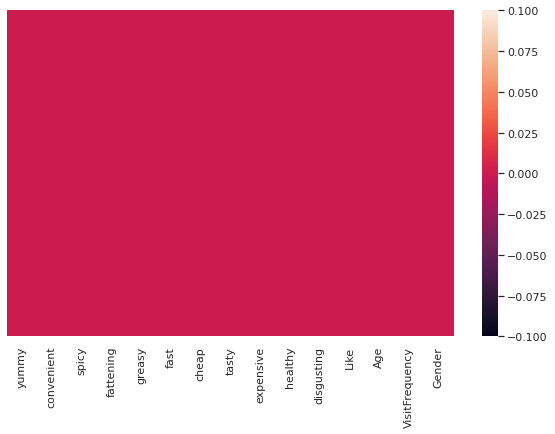

In [156]:
sns.heatmap(dataset.isnull(), yticklabels=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



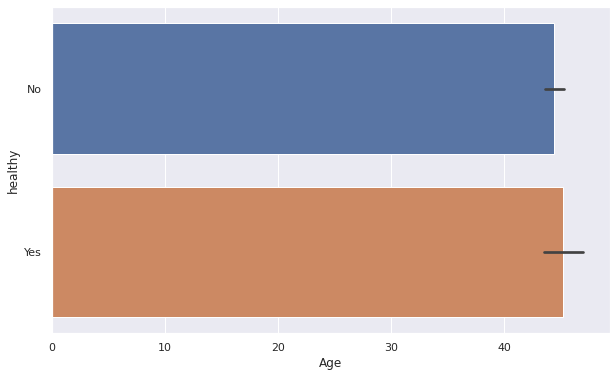

In [157]:
sns.barplot(dataset['Age'],dataset['healthy'])

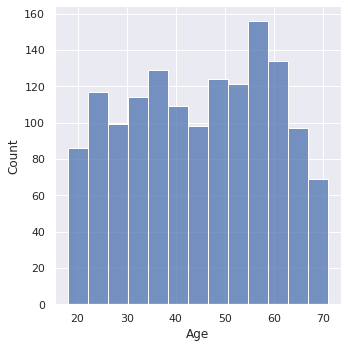

In [158]:
sns.displot(dataset['Age'])

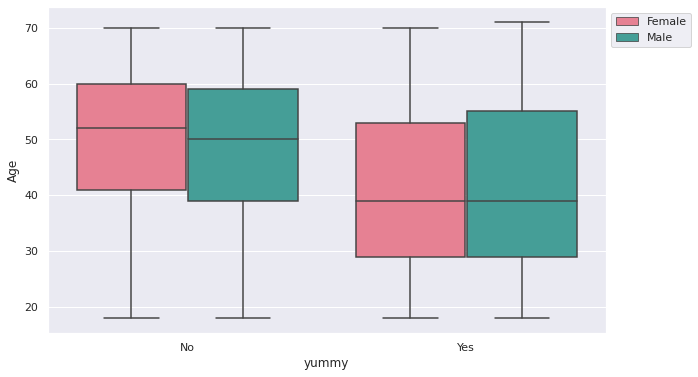

In [159]:
sns.boxplot(data = data, x = 'yummy', y = 'Age', hue='Gender', palette='husl')
plt.legend(bbox_to_anchor = (1,1))

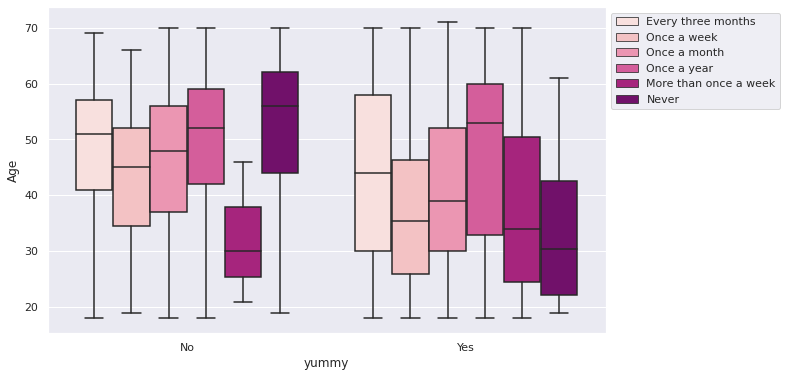

In [160]:
sns.boxplot(data = data, x = 'yummy', y = 'Age', hue='VisitFrequency',  palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

In [161]:
data1 = data.copy()

In [162]:
data1 = data1.iloc[:,0:-4]

In [163]:
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [164]:
data1.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [165]:
data2 = data1.copy()

In [166]:
dat1 = data.replace(to_replace = ['Yes','No'],value = [1,0])
dat1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


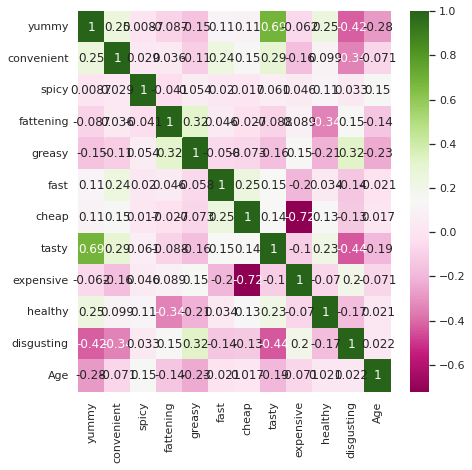

In [167]:
plt.figure(figsize=(7,7))
sns.heatmap(dat1.corr(), annot=True, cmap="PiYG")
plt.show()

In [168]:
for col in (data2.columns):
    data2[col] = data2[col].map({'Yes':1, 'No':0})

In [169]:
data2.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

**Principal Component Analysis (PCA)**

In [170]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [171]:
pca = PCA(n_components=2)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
components = pca.fit_transform(data2)
loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

**K Means Clustering**

In [175]:
from sklearn.cluster import KMeans

In [176]:
data3 = data2.values

In [177]:
l = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data3)
    l.append(kmeans.inertia_)

In [178]:
wcss = pd.DataFrame({'Clusters':list(range(2,20)), 'WCSS':l})

In [179]:
px.bar(data_frame=wcss, x='Clusters', y='WCSS')

In [180]:
kmeans = KMeans(4)
kmeans.fit(data2)
data2['Predicted_Clusters'] = kmeans.predict(data2)

In [181]:
data2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Predicted_Clusters
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,0


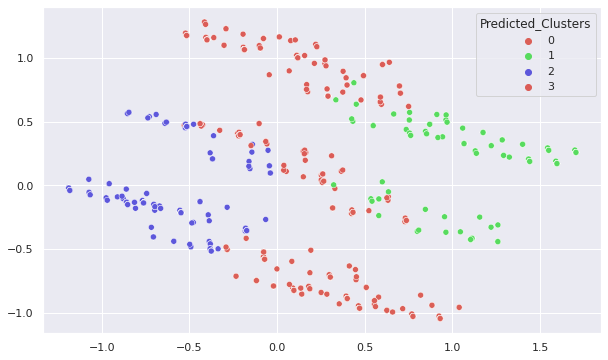

In [182]:
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(x = components[:,0], y = components[:,1], hue=data2['Predicted_Clusters'], palette='hls')